In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=8da9b80cc73089ca147bf867019022ddaa459cec53122bdb7412379b17fddb5d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# Decision Tree

- 결정 트리(decision tree)는 분류와 회귀 문제에 널리 사용하는 모델 <br>
(분류와 회귀에 모두 사용) 회귀를 쓰면 잘안될수도 있음 

- 분할(Split)와 가지치기 (Pruning) 과정을 통해 생성 <br>
(Tree를 만들기 위해 예/아니오 질문을 반복하며 학습)

- 다양한 앙상블(ensemble) 모델이 존재한다 <br>
여러 모델을 하나로 합쳐서 사용한다. = 신경망이랑 비슷
     (RandomForest, GradientBoosting, XGBoost)
     같은 모델도 가능하고 서로 다른 모델도 앙상블이 가능 모델의 모양에 따라 다르다. 

참고

[트리(Tree)의 개념과 특징을 이해 - 블로그](https://gmlwjd9405.github.io/2018/08/12/data-structure-tree.html)

[트리(그래프) - 나무위키](https://namu.wiki/w/%ED%8A%B8%EB%A6%AC(%EA%B7%B8%EB%9E%98%ED%94%84))

[이진 트리 - 위키백과](https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%A7%84_%ED%8A%B8%EB%A6%AC)

#### 트리(tree) 자료구조

- 노드로 이루어진 자료 구조

- 계층 모델

- 그래프의 한 종류
  - '최소 연결 트리' 라고도 불림
  - 사이클(cycle)이 없는 하나의 연결 그래프(Connected Graph) 리프 노드 에서 루트 로 가지 않는 다 라는 말이다.
  - 또는 DAG(Directed Acyclic Graph, 방향성이 있는 비순환 그래프)의 한 종류

- 예) 파일디렉토리

트리(tree) 자료구조에서의 용어

<center>
 <img src="https://gmlwjd9405.github.io/images/data-structure-tree/tree-terms.png" alt="트리(Tree)용어" width="60%" />

</center>

- 노드(node) : 트리는 노드들의 집합으로 트리를 구성, 보통 (value) 값과 부모 자식의 정보를 가진다.
- 루트 노드(root node): 부모가 없는 노드, 트리는 하나의 루트 노드만을 가진다.
- 단말 노드(leaf node): 자식이 없는 노드, '리프',‘말단 노드’ 또는 ‘잎 노드’라고도 부른다.
- 내부(internal) 노드: 단말 노드가 아닌 노드
- 간선(edge): 노드를 연결하는 선 ('엣지', link, branch 라고도 부름)
- 형제(sibling): 같은 부모를 가지는 노드
- 노드의 크기(size): 자신을 포함한 모든 자손 노드의 개수
- 노드의 깊이(depth): 루트에서 어떤 노드에 도달하기 위해 거쳐야 하는 간선의 수
- 노드의 레벨(level): 트리의 특정 깊이를 가지는 노드의 집합
- 노드의 차수(degree): 하위 트리 개수 / 간선 수 (degree) = 각 노드가 지닌 가지의 수
- 트리의 차수(degree of tree): 트리의 최대 차수
- 트리의 높이(height): 루트 노드에서 가장 깊숙히 있는 노드의 깊이

#### 결정 트리(decision tree)

- 의사결정트리는 학습 데이터로부터 조건식을 만들고 예측할 때는 트리의 루트 노드(root node) 부터 순서대로 조건 분기를 타면서 리프 노드(leaf node)에 도달하면 예측 결과를 내는 알고리즘

- 학습 결과로 IF-THEN 형태의 규칙을 생성 (Split)

- 타깃 값이 한 개인 리프 노드를 순수 노드라고 한다. = 부모노드의 타깃이 1개

- 모든 노드가 순수 노드가 될 때 까지 학습하면 모델이 복잡해지고 훈련 데이터에 과대적합이 된다. = 리프 노드 가 적어야 과대 적합 에 좋은 대처 이다. -> 가지 치기가 중요  == 불순도 지수가 0 이면 순수 노드이다.

- 새로운 데이터 포인트가 들어오면 해당하는 노드를 찾고, 분류라면 더 많은 클래스를 선택, 회귀라면 평균을 구한다.
평균을 구하면 이상치 발생시 문제가 발생할수도 있겠네 


특징

- 학습한 모델을 사람이 해석하기 쉽다 -> 시각화 가능
- 입력 데이터에 대한 정규화가 필요 없다 (전처리 과정이 필요없다.)
- 범주형 변수나 데이터의 누락값이 있어도 용인된다
- 특정 조건이 맞으면 과적합을 일으키는 경향이 있다
 - 트리가 깊어질 수록 데이터 수가 적어짐
 - 가지치기(pruning)로 깊이를 줄여서 방지
- 비선형 문제에는 우수하지만 선형 분리 문제는 잘 풀지 못한다 
  - (선형문제는 SVM logistic regression 을 하는것이 좋다)
- 데이터 분포가 특정 클래스에 쏠려 있으면 잘 풀지 못한다
- 데이터의 작은 변화에도 결과가 크게 바뀌기 쉽다
- 예측 성능은 보통이다
 - 모아둔 randomforest 는 학습 하기 좋다.
- 배치 학습만 학습할 수 있다.


종류

- 의사 결정 포레스트, 향상된 의사결정 트리, Random Forest, Rotation Forest 등


결정트리(Decision Tree) 과대적합 제어

- 노드 생성을 미리 중단하는 사전가지치기(pre-pruning)와 트리를 만든후에 크기가 작은 노드를 삭제하는 사후가지치기(pruning)가 있다. <br>
    (sklearn은 사전가지치기만 지원)

가지치기(pruning)
- 하나의 가지 (branch)에 동일한 예측 값이 나오는 경우
 - 의사결정트리는 동일 조건에서 가장 간단한 구조여야 한다.

사전가지치기(pre-pruning)

- 트리의 최대 깊이나 리프노드의 최대 개수를 제어

- 노드가 분할하기 위한 데이터 포인트의 최소 개수를 지정


장단점

- 만들어진 모델을 쉽게 시각화할 수 있어 이해하기 쉽다. <br>
    (white box model)

- 각 특성이 개별 처리되기 때문에 데이터 스케일에 영향을 받지 않아 특성의 정규화나 표준화가 필요 없다.

- 훈련데이터 범위 밖의 포인트는 예측 할 수 없다. <br>
    (ex : 시계열 데이터) - 과거의 데이터를 예측하여 미래를 예측 하는것인데 학습 하지 않은 것은 예측이 불가능 - 선형 모델이 힘든 이유.

- 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다.(과대 적합이 잘뜬다.)


[DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

```
DecisionTreeClassifier(criterion, splitter, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, random_state, max_leaf_nodes, min_impurity_decrease, min_impurity_split, class_weight, presort)
```
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- <font  color=yellow> max_depth : 트리의 최대 깊이 <br>
(값이 클수록 모델의 복잡도가 올라간다.) </font>
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- <font  color=yellow> min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1) </font>
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- <font  color=yellow> max_leaf_nodes : 리프 노드의 최대수 </font>
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부

학습을 미리 중지 시키는 매개변수는 노란색 


In [2]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

#### Decision Tree 실습 01

붓꽃 데이터 결정트리 만들기

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()
train_x,test_x,train_y,test_y = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=11)

# 모델 학습
model = DecisionTreeClassifier(max_depth=4).fit(train_x,train_y)
# 평가
print(model.score(train_x,train_y),model.score(test_x,test_y))

0.9833333333333333 0.8666666666666667


**Graphviz 설치(Windows)**

1. 아래 링크로 들어가서 graphviz-2.38-win32.msi 다운로드 후 설치

> https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/

2. 시스템 환경변수 PATH 에 다음 경로 추가

> C:\Program Files (x86)\Graphviz2.38\bin

```
# 파이썬 래퍼(Wrapper) 모듈을 별도로 설치
# !pip install graphviz
```

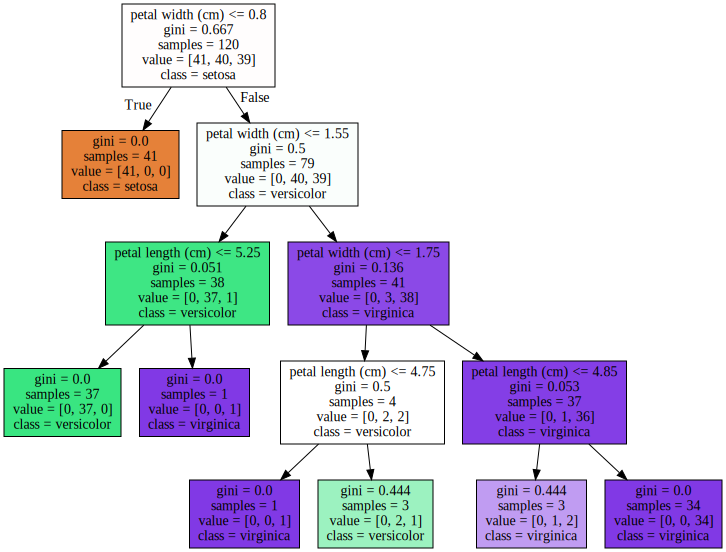

In [4]:
# 결정트리 규칙을 시각화
from sklearn.tree import export_graphviz
import graphviz

# export_graphviz() 를 호출하여 out_file 파라메터의 "tree.dot" 파일을 생성
export_graphviz(model,out_file='tree.dot',class_names= iris.target_names,feature_names= iris.feature_names,filled= True) #impurity = 불순도 지수 표시 여부  ,impurity= False
# "tree.dot" 파일을 graphviz 가 읽어서 주피터 노트북에 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

- 각 규칙에 따라 트리의 브랜치(branch) 노드와 말단 리프(leaf) 노드가 어떻게 구성되는지 시각화

- 트리를 조사할 때 많은 수의 데이터가 흐르는 경로를 찾는 것이 중요

트리 시각화 장점
- 알고리즘의 예측이 어떻게 이뤄지는지 이해가 가능
- 비전문가에게 머신러닝 알고리즘을 설명하기에 좋음

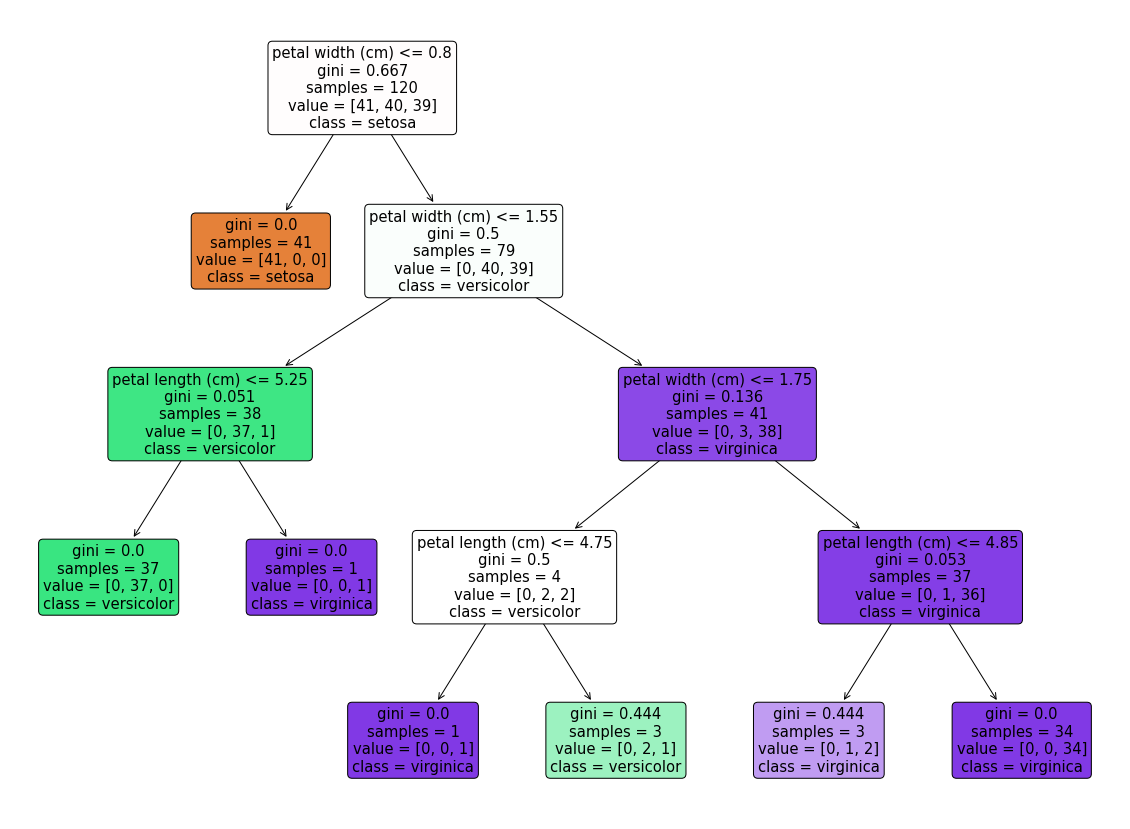

In [5]:
# 사이킷런 0.21 버전 이후 맷플롯립 기반 트리 그래프 시각화 함수 추가
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize = (20,15))
tree.plot_tree(model,class_names= iris.target_names,feature_names= iris.feature_names,filled= True,rounded= True)
plt.show()

0.9833333333333333 0.9333333333333333


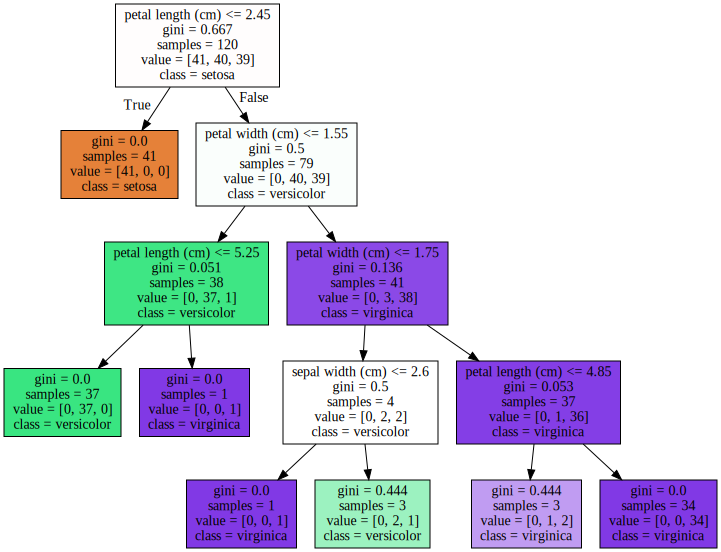

In [6]:
# min_samples_split
# 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수 더이상 나눌 필요가 없을때 까지 나눈다.
# 모델학습 
model = DecisionTreeClassifier(min_samples_split= 4 ,random_state= 42).fit(train_x,train_y)
#sample 이 4개 미만이면 분할하지마라 
# 4까지만 분할 하라 

# 평가
print(model.score(train_x,train_y),model.score(test_x,test_y))
# 결정트리 규칙 시각화
export_graphviz(model,out_file='tree.dot',class_names= iris.target_names,feature_names= iris.feature_names,filled= True) #impurity = 불순도 지수 표시 여부  ,impurity= False
# "tree.dot" 파일을 graphviz 가 읽어서 주피터 노트북에 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

0.9666666666666667 0.9333333333333333


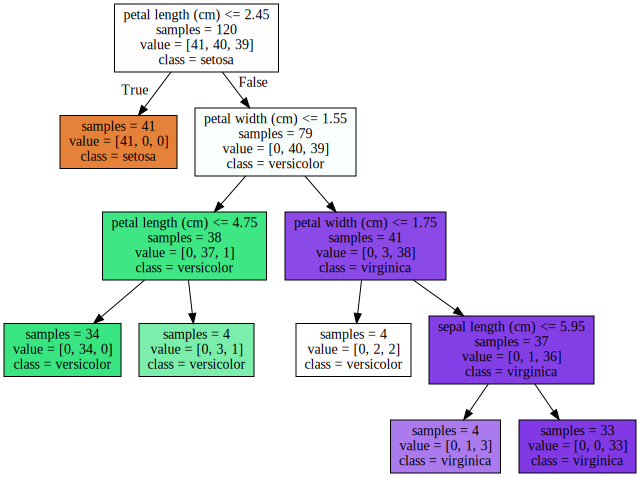

In [7]:
# min_samples_leaf
# 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값 리프노드가 4 가 되면 더이상 노드를 나누지 않는다.
# 모델학습
model = DecisionTreeClassifier(min_samples_leaf= 4,random_state=42).fit(train_x,train_y)

# 평가
print(model.score(train_x,train_y),model.score(test_x,test_y))

# 결정트리 규칙 시각화
export_graphviz(model,out_file='tree.dot',feature_names=iris.feature_names,class_names = iris.target_names,filled = True,impurity= False)

with open('tree.dot') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

##### 트리 특성 중요도

- 특성 중요도(feature importance) : 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가

- 이 값은 0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻
- 특성 중요도의 전체 합은 1

feature_importances_

- 중요한 몇 개의 특성(feature)이 명확한 트리를 만드는 데 크게 기여 </br>
(모델을 좀 더 간결하고 이상치(Outlier)에 강한 모델을 만들 수 있기 때문)
- 결정트리가 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 feature_importances_ 로 제공

특성 중요도 [0.006 0.    0.546 0.448]
1.0


'\n꽃잎의 길이와 너비 가 중요도 가 높은것으로 확인 할수 있다.\n학습 데이터에 따라 중요도가 달라지고 \n꼭 높은데 중요 한게 아니다 \n'

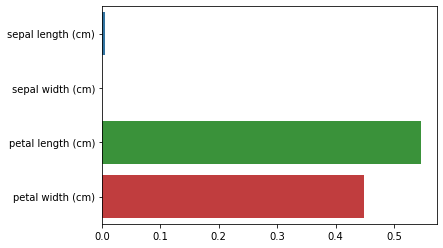

In [8]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('특성 중요도 {}'.format(np.round(model.feature_importances_,3))) #특성에 대한 중요도를 나타낸다.
print(sum(model.feature_importances_)) #특성 중요도의 합은 1 이다
# feature별 importance 매핑

# feature importance를 column 별로 시각화 하기 
sns.barplot(x = model.feature_importances_,y = iris.feature_names)

'''
꽃잎의 길이와 너비 가 중요도 가 높은것으로 확인 할수 있다.
학습 데이터에 따라 중요도가 달라지고 
꼭 높은데 중요 한게 아니다 
'''

#### Decision Tree 실습 02

two_moon 데이터 결정트리 만들기

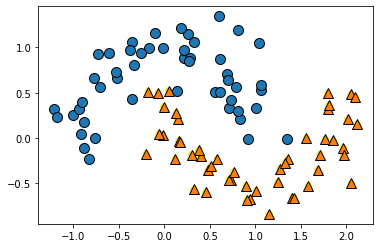

In [9]:
import mglearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 로드
x,y = make_moons(noise= 0.2 ,random_state= 0)


# 훈련/테스트 데이터 준비
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)
# 데이터 시각화
plt.scatter(x[:,0],x[:,1],c = y)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.show()

In [10]:
# 모델 생성과 학습
from sklearn.tree import DecisionTreeClassifier

# max_depth를 주지 않으면 과대적합 가능성 높음
model = DecisionTreeClassifier(max_depth=3,random_state=0).fit(train_x,train_y)

print(model.score(train_x,train_y),model.score(test_x,test_y)) 

0.9333333333333333 0.88


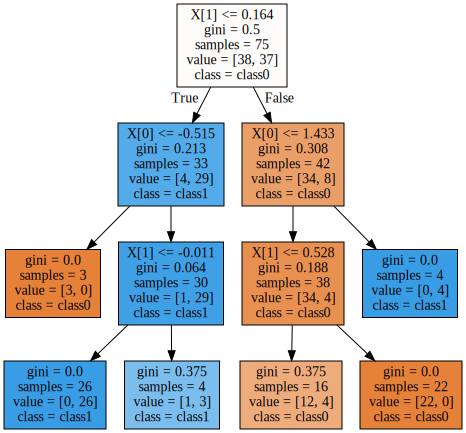

In [11]:
# 결정트리 규칙을 시각화
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(model,out_file='tree.dot',class_names=['class0','class1'],impurity=True , filled = True)

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [12]:
# 트리 특성 중요도
print(model.feature_importances_)

[0.36312923 0.63687077]


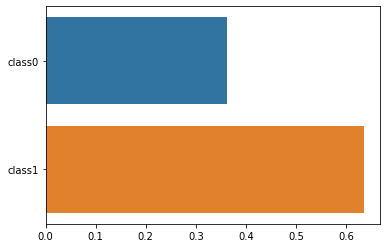

In [13]:
# 특성 중요도 시각화
import numpy as np
sns.barplot(model.feature_importances_ ,['class0','class1'])

#### 분류 결과 시각화

In [14]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def plot_decision_boundary(model, X, y):
    padding=0.15
    res=0.01
    
    # 데이터 세트의 x, y의 최대 값과 최소값
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    
    # x와 y의 범위
    x_range = x_max - x_min
    y_range = y_max - y_min
    
    # 범위에 패딩 추가
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # 위의 포인트 범위로 메쉬그리드를 생성
    xx,yy = np.meshgrid( np.arange(x_min,x_max,res), np.arange(y_min,y_max,res) )
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    # 모델을 사용하여 그리드 라벨의 각 지점에서 클래스를 예측하여 2D 배열을 벡터로 변환
    # c_ concatenates 예측을 수행 할 하나의 긴 벡터를 만듭니다.
    # 마지막으로 예측 벡터는 원래 데이터 형태로 재구성됩니다.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    # contourf() 를 이용하여 그리드에 class boundary를 시각화
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    
    # 원래 데이터와 레이블을 시각화
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)

<Figure size 936x504 with 0 Axes>

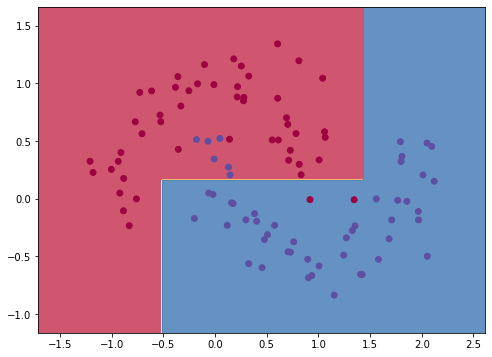

In [15]:
# 분류 결과 시각화
plt.figure(figsize = (13,7))
plot_decision_boundary(model,x,y)
plt.show()
#mglearn.plots.plot_tree_partition(train_x,train_y,model)

- 결정경계 : 영역을 반복해서 나눠가는 과정에서 정해지기 때문에 직선 형태(비선형 데이터 )를 취하지 않음
 - 선형 분리가 불가능한 문제에 유리

- 불순도 (impurity)를 기준으로 가능한 같은 클래스끼리 모이도록 조건 분기 학습
 - 엔트로피(Entropy), 지니계수(Gini coefficient)

#### 의사결정 트리 과정

- 불순도로 Gini 지수를 사용한 경우

 - 지니 불순도

 > ${ G }_{ i }= 1-\sum\limits _{ k=1 }^{ n }{ { p }_{ i,k }^{ 2 }  }  $
 
 > [10, 6] 의 GI :$ G(A)=1-{ (\frac { 10 }{ 16 } ) }^{ 2 } - { (\frac { 6 }{ 16 } ) }^{ 2 }\approx  0.47 $






 - 의사결정나무는 구분 뒤 각 영역의 순도가 증가/불확실성이 최대한 감소하도록 학습

 > \\( GI=\sum\limits _{ i=1 }^{ d }{ { (R }_{ i }(1-\sum\limits _{ k=1 }^{ m }{ { p }_{ ik }^{ 2 })) }  }  \\)

 - \\( { p }_{ k } \\)
: 분리된 집단에서 k집단이 속한 비율,
 - \\( { R }_{ i } \\)
: 전체집단에서 분리된 집단의 비율


○의 GI (적색선으로 분리한 후) : \\( G(A)=0.5 \times (1-{ (\frac { 7 }{ 8 } ) }^{ 2 }-{ (\frac { 1 }{ 8 } ) }^{ 2 } )  + 0.5 \times (1-{ (\frac { 5 }{ 8 } ) }^{ 2 }-{ (\frac { 3 }{ 8 } ) }^{ 2 } ) \approx 0.34 \\)

#### 결정트리 과적합(Overfitting)


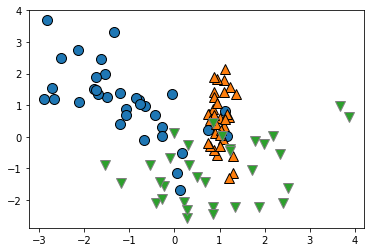

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

# 2차원 시각화를 위해서 feature는 2개, 
# 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
x,y = make_classification(n_features=2,n_classes=3,random_state=0,n_redundant=0,n_clusters_per_class=1)

# plot 형태로 2개의 feature로 2차원 좌표 시각화
mglearn.discrete_scatter(x[:,0],x[:,1],y)
#plt.scatter(x[:,0],x[:,1],y)
plt.show()
# 각 클래스값은 다른 색깔로 표시


'\n매우 잘게 쪼갠것으로 확인 할수 있다.\n'

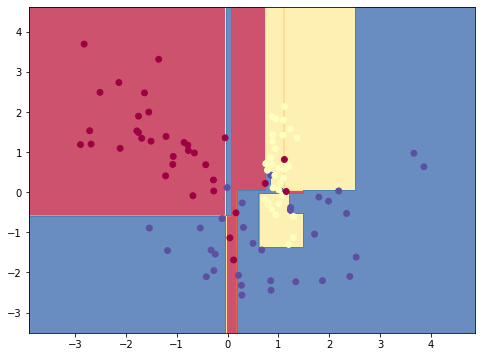

In [17]:
# 결정기준 경계를 시각화
# 결정트리 생성에 별다른 제약이 없도록 하이퍼 파라미터를 디폴트로 생성
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x,y)
plot_decision_boundary(model,x,y)
'''
매우 잘게 쪼갠것으로 확인 할수 있다.
'''
# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화

'\n규칙을 주면 심플 한 모양을 만들수 있다.\nmax_depth  = 1 이면 두개로만 나눔 \nmax_depth 의 수치가 바로 학습을 얼마나 할것이냐 여부라고 생각하면 쉽다 \n'

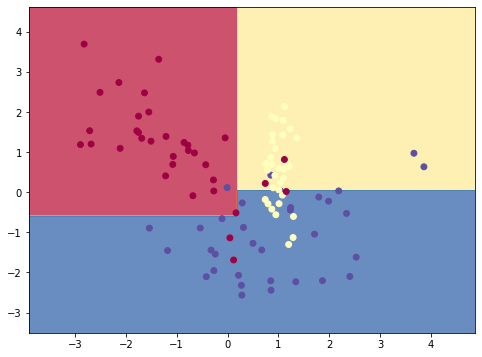

In [18]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화

model = DecisionTreeClassifier(max_depth = 3,min_samples_leaf=6).fit(x,y)
plot_decision_boundary(model,x,y)
'''
규칙을 주면 심플 한 모양을 만들수 있다.
max_depth  = 1 이면 두개로만 나눔 
max_depth 의 수치가 바로 학습을 얼마나 할것이냐 여부라고 생각하면 쉽다 
'''
# 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 강화 

#### Decision Tree 실습 03

유방암 데이터에 결정트리 적용 및 사전 가지치기

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# stratify : 지정한 Data의 비율을 유지
# 예를 들어, Label Set인 y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
# stratify=y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한채 분할된다.
train_x,test_x,train_y,test_y = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

In [20]:
# 모델학습
model = DecisionTreeClassifier().fit(train_x,train_y)
# 모든 리프 노드가 순수노드이면 훈련 세트 정확도는 100% = 완벽하게 분리이 된다  = 아무 옵션도 안주었을떄 
# 정확도
print(model.score(train_x,train_y),model.score(test_x,test_y))

1.0 0.916083916083916


- 트리의 깊이를 제한하면 과대적합이 줄어듦
- 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선

In [21]:
# 사전가지치기
pru = [1,2,3,4,5]
# 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막음
# 1) max_depth=4 : 연속된 질문을 최대 (4)개로 제한
#for i in pru:
model = DecisionTreeClassifier(min_samples_leaf=12,random_state=0).fit(train_x,train_y)
# 정확도
print(model.score(train_x,train_y),model.score(test_x,test_y))


0.9624413145539906 0.951048951048951


In [22]:
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,out_file='tree.dot',feature_names=cancer.feature_names,class_names = ["악성","양성"],filled= True ,impurity= True)

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)
'''
밑에서 부터 sample 이나 깊이 leaf 를 보고 결정하면 된다.
'''

'\n밑에서 부터 sample 이나 깊이 leaf 를 보고 결정하면 된다.\n'

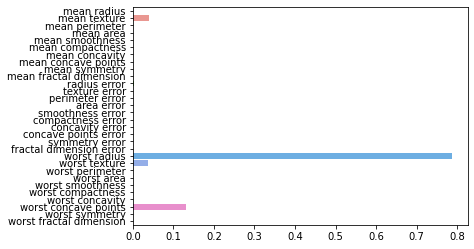

In [23]:
# 특성 중요도 시각화
# feature importance를 column 별로 시각화 하기 
sns.barplot(x = model.feature_importances_,y = cancer.feature_names)

- 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아님 = 과적합에 영향을 주는것이 아니라 트리가 선택한 특성이다.

- 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있음

#### Decision Tree 실습 04

타이타닉 데이터 사용

In [1]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt		   ml_class.png		   stock-data.csv
 매수종목2.txt		   pca_1.png		  'stock price.xlsx'
 adult.data		   pca_2.png		  'stock valuation.xlsx'
 auto-mpg.csv		   pca_3.png		   test.db.db
 bmi_500.csv		   Picture1.png		   test.txt
 citibike.csv		   population_number.csv   text.txt
 매수종목.csv		   ram_price.csv	   ThoraricSurgery.csv
 data_mine.csv		   ratings_small.txt	   titanic.xls
 data_population.csv	   ratings_test.txt	   tmdb_5000_credits.csv
 data_studentlist_en.csv   ratings_train.txt	   tmdb_5000_movies.csv
 demo.docx		   sample1.pdf		   Traffic_Accident_2017.csv
 diabetes.csv		   sample2.pdf		   train.csv
 example.docx		   sample.docx		   user_id_mean.csv
 height_weight.txt	   sample_merge.pdf	   wine.csv
 HelloWorld.xlsx	   sample.xlsx		   주가데이터.xlsx
 house_price.csv	   score.csv		   남북한발전전력량.xlsx
 lenna.png		   seoul.html
 little-char.png	   sonar.csv


##### 데이터 준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_excel(drive_path + 'titanic.xls')

In [3]:
df.sex

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

##### 데이터 분석 (시각화, EDA - 탐색적 데이터분석)

- 데이터를 세부적으로 살펴보는 것 <br> 
  (결측치, 이상치, 데이터분포, 라벨의 분포, 범주형 데이터의 종류 등 확인)
- 데이터를 시각화
- 데이터를 어떻게 수정할 것인지 결정

In [16]:
# 결측치 확인
df_age = df.sort_values(by=["age","sex"],ascending=[True,False])
df_age[df_age.age == 20]





,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
520,2,1,"Nourney, Mr. Alfred (""Baron von Drachstedt"")",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,7,NaN,"Cologne, Germany"
606,3,1,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,SOTON/O2 3101284,7.9250,NaN,S,15,NaN,"Taalintehdas, Finland Hoboken, NJ"
615,3,0,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,NaN,NaN,"Salo, Finland Astoria, OR"
633,3,0,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,NaN,NaN,"Sweden Chicago, IL"
654,3,0,"Baccos, Mr. Raffull",male,20.0,0,0,2679,7.2250,NaN,C,NaN,NaN,NaN
664,3,1,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,15,NaN,NaN
673,3,0,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,NaN,NaN,Syria
718,3,0,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S,NaN,NaN,Portugal
836,3,0,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,NaN,NaN,"Waukegan, Chicago, IL"
846,3,0,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S,NaN,NaN,NaN


####결측치 결과 
age 263 fare 1 cabin 1014 embarked = 2 ,boat = 823 body = 1188 home.dest = 564


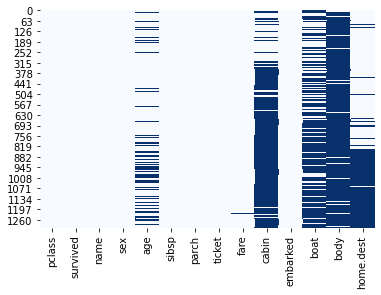

In [27]:
df.isnull().sum()
sns.heatmap(df.isnull(), cmap='Blues', cbar=False)

- pclass : 객실 등급
- survived : 생존 유무
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- fare : 지불한 운임
- boat : 탈출한 보트가 있다면 boat 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [28]:
df.age

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [29]:
# 이상치 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


0    809
1    500
Name: survived, dtype: int64


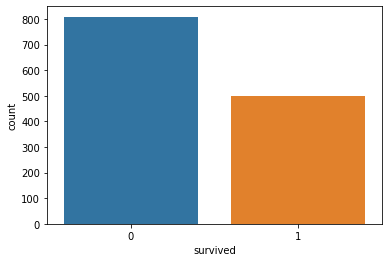

In [30]:
# 생존자 수 확인
import seaborn as sns
print(df.survived.value_counts())

# countplot: 범주형 변수의 빈도수를 시각화 
#sns.countplot(y = df.survived)
sns.countplot('survived',data = df)

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
26.5000     1
67.0000     1
70.5000     1
76.0000     1
0.6667      1
Name: age, Length: 98, dtype: int64


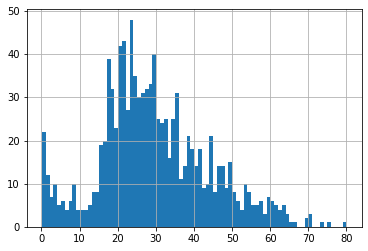

In [31]:
# 나이순으로 숫자 보기
df['age'].hist(bins = 80)
print(df.age.value_counts())

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


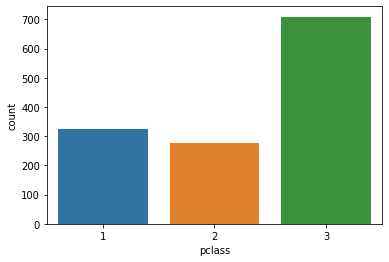

In [32]:
# 선실 등급별 상황
sns.countplot('pclass',data = df)
df.groupby('pclass').mean()

**heatmap**

- Target Feature와 나머지 독립변수들의 상관계수를 직관적으로 확인
- 데이터.corr() : heatmap에 사용할 데이터의 상관계수

'\n+ - 구분하지 않고 1 과 가까운 특성이 선형성이 높다는것을 알수 있다 \n상관계수의 정의에 의해 \n\n'

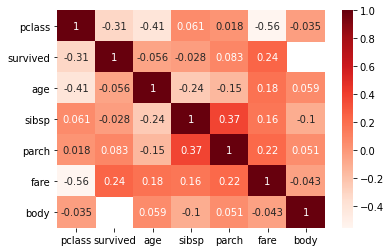

In [33]:
# 특성의 상관관계 분석
sns.heatmap(df.corr(), cmap='Reds', cbar=True,annot=True)
'''
+ - 구분하지 않고 1 과 가까운 특성이 선형성이 높다는것을 알수 있다 
상관계수의 정의에 의해 

'''

- 생존률과의 관계?


In [34]:
# 객실 등급(pclass)별, 연령대별, 성별 비교

# seaborn은 barplot() 함수를 사용할 때 
# 각 막대에 기본적으로 오차막대(error bar)가 함께 나타나도록 되어 있다.
# 오차막대를 그리는 범위는 기본적으로 
# “이 데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻을 것”을 의미한다.
x = df['age']
binx = [0,10,20,50,100]
label = ['baby','teenage','adult','old']
df['age_cut'] = pd.cut(x = x,bins = binx,labels = label,include_lowest= True)

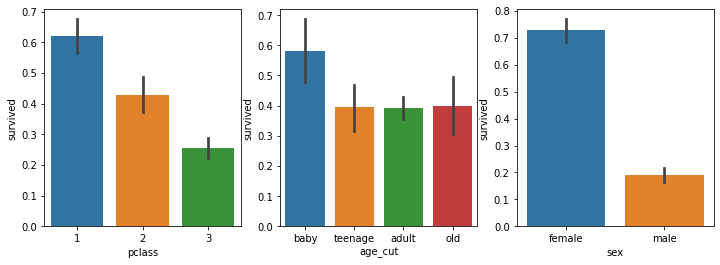

In [35]:
fig,axes = plt.subplots(1,3,figsize = (12,4))
sns.barplot('pclass','survived',data = df,ax = axes[0])
sns.barplot('age_cut','survived',data = df,ax = axes[1])
sns.barplot('sex','survived',data = df,ax = axes[2])

'\n0세 부분이 생존률이 높았고 \n청년 층이 사망이 더 높았다\n\n'

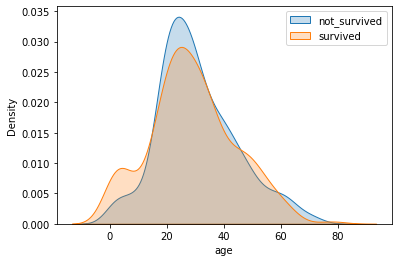

In [36]:
# 연령대별 생존여부 분포 비교

# 커널밀도추정 KDE ; 데이터의 분포를 확인
age_survived_0 = df['age'][(df['survived'] == 0) & (df['age'].notnull())]
age_survived_1 = df['age'][(df['survived'] == 1) & (df['age'].notnull())]
sns.kdeplot(age_survived_0,shade=True,label = 'not_survived')
sns.kdeplot(age_survived_1,shade=True,label = 'survived')
plt.legend()
'''
0세 부분이 생존률이 높았고 
청년 층이 사망이 더 높았다

'''

- 성별 생존자수 비교 결과?


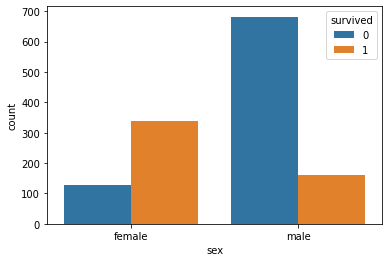

In [37]:
# 성별 생존자수 비교
#sns.countplot('sex',data = df)
sns.countplot('sex',hue = 'survived',data = df) #남자가 많이 죽었다.

- 구조 보트에 탑승하고도 사망한 비율 ??%


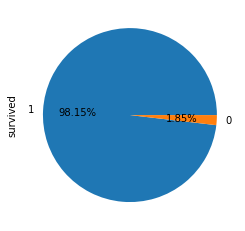

In [38]:
# 구조 보트에 탑승하고도 사망한 비율
'''boat_survived_0 = df['boat'][(df['survived'] == 0) & (df['boat'].notnull())]
boat_survived_1 = df['boat'][(df['survived'] == 1) &(df['boat'].notnull())]
print(boat_survived_0)
print(boat_survived_1)'''

boat_s = df[df['boat'].notnull()]
#sns.countplot('survived',data = df)
boat_s['survived'].value_counts().plot.pie(autopct = '%1.2f%%')


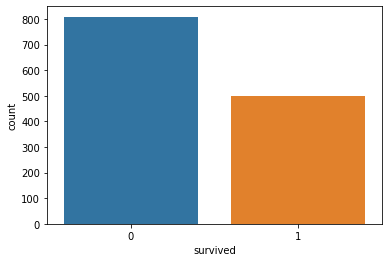

In [39]:
sns.countplot('survived',data = df)

##### 데이터 전처리

In [40]:
df = pd.read_excel(drive_path + 'titanic.xls')

In [41]:
# - embarked : 탑승장소별 컬럼 추가
# S=Southhampton, C=Cherbourg, Q=Queenstown
df['embarked_q']=df['embarked'] == 'Q'
df['embarked_s']=['embarked'] == 'S'
df['embarked_c']=['embarked'] == 'C'
# 데이터에서 여성을 1로 남성을 0으로 설정
df.loc[df['sex'] == 'male','sex'] = 0 #값들을 하나하나 가져와서 변경
df.loc[df['sex'] == 'female','sex'] = 1
#pd.get_dummies(df['sex'])

# fare : 지불한 운임
# 결측치 채움
#df['fare'].fillna(fare_mean)
fare_mean = df['fare'].mean()
df.loc[ pd.isnull(df['fare']),'fare'] = fare_mean

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1046 non-null   float64
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   cabin       295 non-null    object 
 10  embarked    1307 non-null   object 
 11  boat        486 non-null    object 
 12  body        121 non-null    float64
 13  home.dest   745 non-null    object 
 14  embarked_q  1309 non-null   bool   
 15  embarked_s  1309 non-null   bool   
 16  embarked_c  1309 non-null   bool   
dtypes: bool(3), float64(3), int64(4), object(7)
memory usage: 147.1+ KB


In [42]:
# Feature 선택
# X = 객실 클래스, 성별, 요금, 선착장 3개, 총 6요소(class sex fare )
feature_names = ['pclass','sex','fare','embarked_c','embarked_q','embarked_s']
x = df[feature_names]
x.shape

(1309, 6)

In [43]:
# 정답셋 준비
# y = "survived"
y = df['survived']
y = y.astype('int64')
y.shape
type(y)
print(type(y[0]))
y.value_counts()


<class 'numpy.int64'>


0    809
1    500
Name: survived, dtype: int64

In [44]:
df.embarked_q

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: embarked_q, Length: 1309, dtype: bool

In [45]:
df['embarked'] == 'Q'
df['embarked'] == 'S'
df['embarked'] == 'C'

0       False
1       False
2       False
3       False
4       False
        ...  
1304     True
1305     True
1306     True
1307     True
1308    False
Name: embarked, Length: 1309, dtype: bool

In [46]:
fare_mean = df['fare'].mean()

In [47]:
pd.get_dummies(df['embarked'])

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,1,0,0
1305,1,0,0
1306,1,0,0
1307,1,0,0


#### Decision Tree 실습 05

결정트리로 타이타닉 생존자 예측

In [48]:
# 데이터 분리
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=13)

In [49]:
# 결정트리 적용
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=7)
model.fit(train_x,train_y)
print(model.score(train_x,train_y),model.score(test_x,test_y))

0.8361629881154499 0.8244274809160306


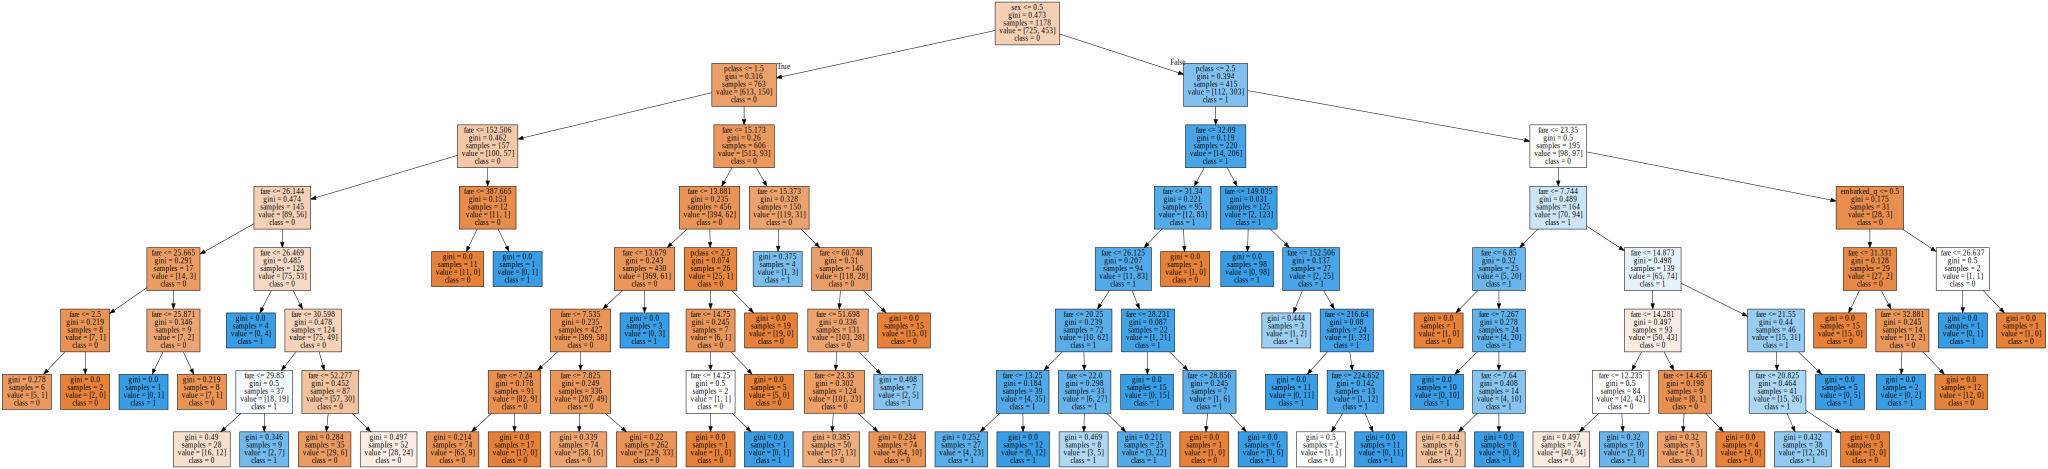

In [50]:
# 트리 구조 시각화하기
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(model,out_file='tree.dot',feature_names=feature_names,class_names = ['0','1'],filled = True,impurity=True)

with open('tree.dot') as f:
  dot_graph = f.read()


graphviz.Source(dot_graph)


In [51]:
# 정확도 예측하기 (accuracy_score)
from sklearn.metrics import accuracy_score
pred_y = model.predict(test_x)
print(accuracy_score(test_y,pred_y))

0.8244274809160306


In [52]:
# 실제 데이터를 넣어서 예측하기
# pclass, sex, age, sibsp, parch, fare
import numpy as np 

# dicaprio = [3., 0., 19., 0., 0., 5.]
# winslet  = [1., 1., 17., 1., 2., 100.] 
dicaprio = [3., 0., 19., True, False, False]
winslet  = [1., 1., 17., False, False, True]

model.predict([dicaprio])
model.predict([winslet])

print(model.predict_proba([dicaprio]))

[[0.74 0.26]]


## 결정 트리 회귀

- 분류 결정 트리와 비슷
- 각 노드에서 클래스를 예측하는 대신 어떤 값을 예측 (분류는 1/0 회귀는 평균값)
- 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없음(범위가 벗어나면 예측 못함 그래프가 구간별로 달라지는 경우 = 주식 시세 같은 경우)
 - (다른 모든 트리기반 회귀 모델도 동일)

[DecisionTreeRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

```
DecisionTreeRegressor(criterion, splitter, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, random_state, max_leaf_nodes, min_impurity_decrease, min_impurity_split, presort, ccp_alpha)
```
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- <font  color=yellow> max_depth : 트리의 최대 깊이 <br>
(값이 클수록 모델의 복잡도가 올라간다.) </font>
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- <font  color=yellow> min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1) </font>
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- <font  color=yellow> max_leaf_nodes : 리프 노드의 최대수 </font>
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- presort : 데이터 정렬 필요 여부 (버전 0.22부터 사용되지 않음)
- ccp_alpha : 최소 비용 복잡성 가지 치기(Minimal Cost-Complexity Pruning) 복잡성 매개변수, 음이아닌 float (버전 0.22의 새로운 기능)


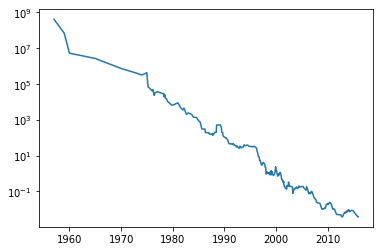

In [53]:
import numpy as np
import pandas as pd
import os
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv")) #os.path.join(mglearn 에 들어있는 ram_prices) : 

# 로그 스케일로 그린 램 가격 동향
plt.semilogy(ram_prices.date,ram_prices.price)
#plt.plot() 을 안쓴 이유 : y_scale 차이가 너무 커서 log 값으로 바꿔줘야 한다
#plt.yscale("log")
plt.show()


In [54]:
print(ram_prices)

     Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
..          ...      ...           ...
328         328  2015.58  4.500000e-03
329         329  2015.67  4.300000e-03
330         330  2015.75  4.200000e-03
331         331  2015.83  3.800000e-03
332         332  2015.92  3.700000e-03

[333 rows x 3 columns]


- y 축은 로그 스케일
- 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 비교적 예측하기 쉬움

In [55]:
# 결정트리 회귀 적용
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듬 시계열 데이터는 날짜를 기준으로 나눠야 한다 (필수)
train_data = ram_prices[ram_prices['date'] <2000.0]
test_data = ram_prices[ram_prices['date'] >=2000.0]

# 가격 예측을 위해 날짜 특성만을 이용
train_x = train_data.date[:,np.newaxis]
test_x = ram_prices.date[:,np.newaxis]

# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 변경.
train_y = np.log(train_data.price)
test_y = np.log(test_data.price)

#model
model_d = DecisionTreeRegressor().fit(train_x,train_y)
model_l = LinearRegression().fit(train_x,train_y)

# 예측은 전체 기간에 대해서 수행합니다.
pred_d = model_d.predict(test_x)
pred_l = model_l.predict(test_x)

# 예측한 값의 로그 스케일 되돌림
price_tree = np.exp(pred_d)
price_lr = np.exp(pred_l)

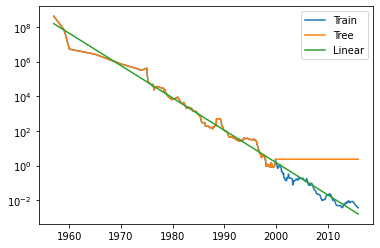

In [56]:
# 결과 시각화
#plt.plot(test_x,price_tree)
plt.semilogy(ram_prices.date,ram_prices.price,label = 'Train')
plt.semilogy(ram_prices.date,price_tree,label = 'Tree')
plt.semilogy(ram_prices.date,price_lr,label = 'Linear')
plt.legend()

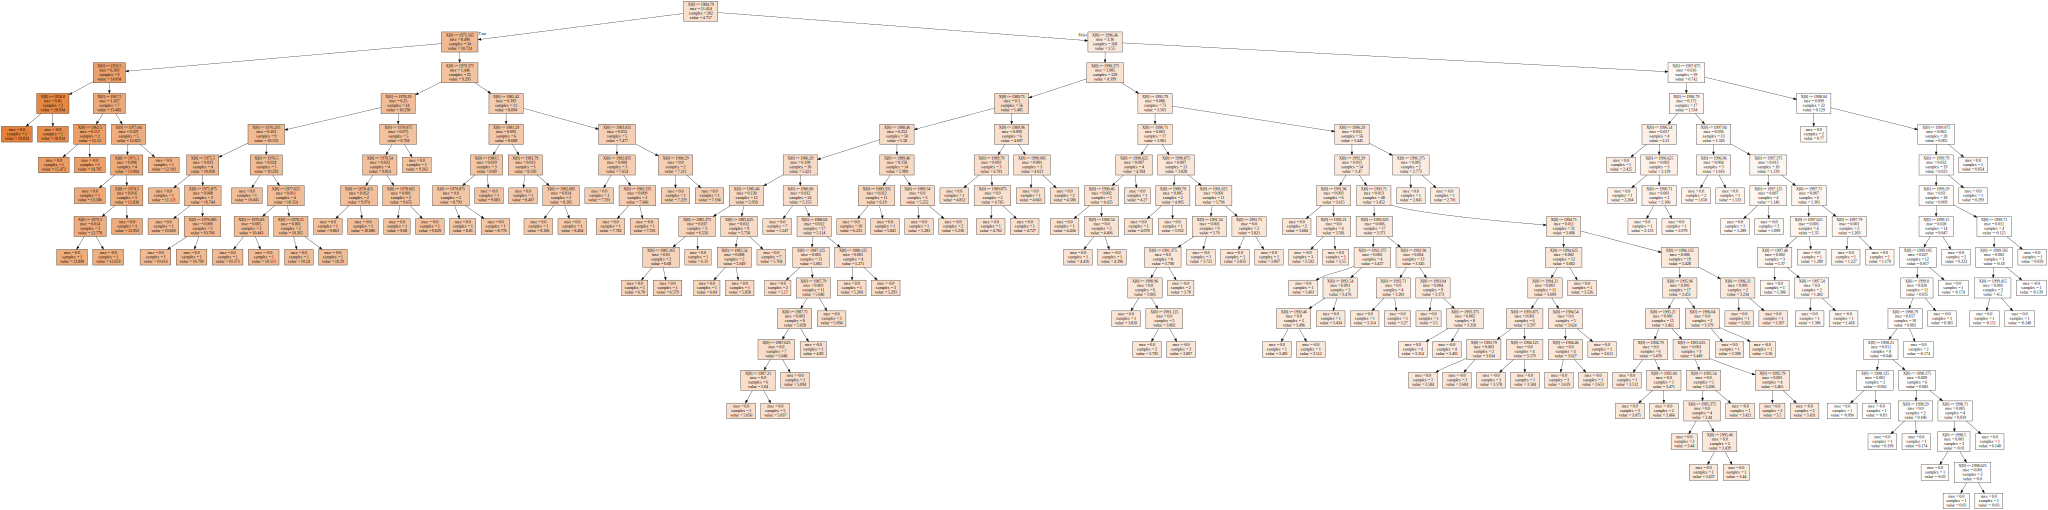

In [57]:
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz

dot_graph = export_graphviz(model_d,filled = True , impurity = True)

graphviz.Source(dot_graph)

- 선형 모델은 우리가 아는 대로 직선으로 데이터를 근사
- 이 직선은 훈련 데이터와 테스트 데이터에 있는 미세한 굴곡을 매끈하게 근사하여 테스트 데이터(2000년 이후)를 꽤 정확히 예측
- 반면에 트리 모델은 훈련 데이터를 완벽하게 예측
- 트리의 복잡도에 제한을 두지 않아서 전체 데이터셋을 모두 기억하기 때문
- 그러나 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는 게 전부
- 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없음


-  사전 가지치기 방법 중 max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분

- 다른 알고리즘들보다 나은 점 : 만들어진 모델을 쉽게 시각화할 수 있음, 데이터의 스케일에 구애받지 않음 (스케일링이 필요 없음)

- 주요 단점 : 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않음